In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 39.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=11db0a222bebb5d47f032838557db8d04cc7511e843ba8da21518fff26c0802c
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
pip install haversine

In [3]:
pip install pyproj

     |████████████████████████████████| 6.3 MB 26.6 MB/s 


In [4]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mglearn
from sklearn.cluster import KMeans
import folium
import numpy
from haversine import haversine
from pyproj import Proj, transform
import numpy as np
import pandas  as pd

In [6]:
df1 = pd.read_excel('/content/6290000_광주광역시_03_06_01_P_공연장.xlsx')
df2 = pd.read_excel('/content/6290000_광주광역시_03_07_05_P_박물관, 미술관.xlsx')
df3 = pd.read_excel('/content/6290000_광주광역시_03_07_08_P_유원시설업(기타).xlsx')
df4 = pd.read_excel('/content/6290000_광주광역시_03_07_09_P_일반유원시설업.xlsx')
df5 = pd.read_excel('/content/6290000_광주광역시_03_07_11_P_전통사찰.xlsx')
df6 = pd.read_excel('/content/6290000_광주광역시_03_07_12_P_종합유원시설업.xlsx')
df7 = pd.read_excel('/content/6290000_광주광역시_03_07_14_P_지방문화원.xlsx')
df8 = pd.read_excel('/content/6290000_광주광역시_03_11_06_P_한옥체험업.xlsx')

df_bus = pd.read_csv('/content/광주시 버스 정류장 정보.csv', encoding='cp949')

In [7]:
# 데이터프레임 합치기
df_merged = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])
# df_merged.head(1)

In [8]:
# 폐업한 곳 빼기
df_merged.drop(df_merged['상세영업상태명'] == '폐업', inplace=True)

In [9]:
# 중부원점(Bessel): 서울 등 중부지역 EPSG:2097
proj_1 = Proj(init='epsg:2097')

# WGS84 경위도: GPS가 사용하는 좌표계 EPSG:4326
proj_2 = Proj(init='epsg:4326')

In [10]:
# 좌표 변환해서 원본 데이터프레임에 추가해줌
x_list = []
y_list = []

for idx, row in df_merged.iterrows():
    x, y = row['좌표정보(X)'], row['좌표정보(Y)']
    x_, y_ = transform(proj_1, proj_2, x, y)
    x_list.append(x_)
    y_list.append(y_)
    
df_merged['경도'] = x_list
df_merged['위도'] = y_list

In [11]:
# 위경도만 뽑아서 데이터프레임으로 만들기
df_loc = df_merged[['개방서비스명', '사업장명', '위도', '경도', '도로명전체주소']]

In [12]:
# inf 제거
df_loc = df_loc.replace([np.inf, -np.inf], np.nan)
df_loc = df_loc.dropna()

In [13]:
# 업종별 확인해보기
df_loc[df_loc['개방서비스명'] == '박물관, 미술관']

,개방서비스명,사업장명,위도,경도,도로명전체주소
6,"박물관, 미술관",비움박물관,35.150421,126.917408,광주광역시 동구 제봉로 143-1 (대의동)
7,"박물관, 미술관",무등현대미술관,35.134176,126.950831,광주광역시 동구 증심사길 9 (운림동)
8,"박물관, 미술관",국윤미술관,35.131886,126.933625,광주광역시 동구 의재로 82 (소태동)
9,"박물관, 미술관",은암미술관,35.150026,126.917753,광주광역시 동구 서석로85번길 8-12 (대의동)
10,"박물관, 미술관",시화문화마을 금봉미술관,35.179292,126.937794,광주광역시 북구 각화대로 91 (각화동)
11,"박물관, 미술관",주안미술관,35.153333,126.912714,광주광역시 동구 제봉로 197 (대인동)
12,"박물관, 미술관",소암미술관,35.143774,126.904123,광주광역시 남구 중앙로 83-1 (서동)
13,"박물관, 미술관",진한미술관,35.149783,126.914122,광주광역시 동구 중앙로196번길 14 (금남로3가)
15,"박물관, 미술관",광주광역시 남구 이강하미술관,35.136885,126.912783,광주광역시 남구 3·1만세운동길 6-0 (양림동)
17,"박물관, 미술관",의재미술관,35.129145,126.964523,광주광역시 동구 증심사길 155 (운림동)


# 관광지 군집화

In [14]:
df = df_loc[['위도', '경도']]

In [15]:
# 군집화
X = df.values
kmeans = KMeans(n_clusters = 10, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [16]:
# 라벨 확인하기
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 2, 2, 9, 4,
       4, 4, 4, 4, 4, 9, 1, 1, 1, 9, 1, 1, 8, 8, 2, 2, 8, 8, 7, 0, 7, 3,
       0, 1, 5, 5, 1, 8, 1, 1, 1, 1, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 9, 4, 9, 9, 9, 9, 9, 2, 9,
       9, 2, 3, 3, 6, 6, 8, 6, 8, 6, 3, 3, 6, 6, 1, 3, 6, 6, 2, 6, 6, 3,
       8, 0, 7, 3, 7, 7, 3, 3, 7, 7, 7, 7, 0, 7, 3, 7, 0, 0, 7, 7, 3, 7,
       0, 7, 3, 7, 7, 0, 7, 7, 7, 7, 7, 0, 7, 0, 7, 7, 1, 1, 5, 1, 3, 6,
       5, 9, 8, 5, 9, 8, 0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 7,
       0], dtype=int32)

In [17]:
# 클러스터 중심점 확인하기
k_center1 = kmeans.cluster_centers_.tolist()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


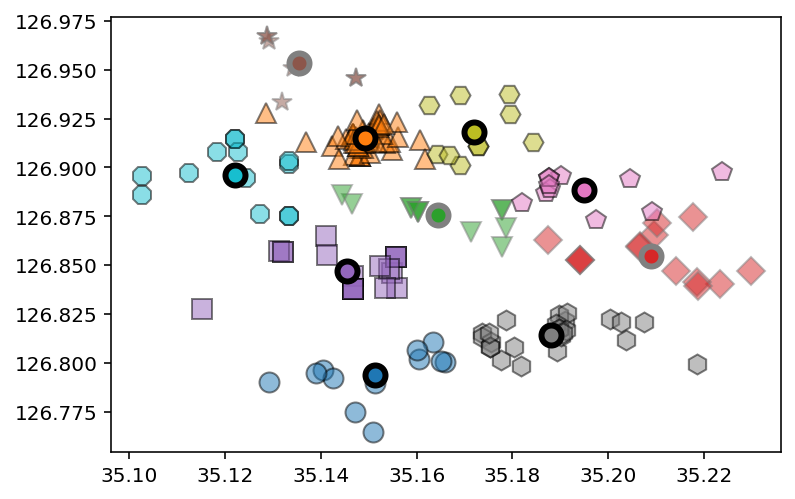

In [18]:
# 클러스터 중심을 시각화
kmeans.cluster_centers_

mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, alpha=0.5)

xcenter = kmeans.cluster_centers_[:, 0]
ycenter = kmeans.cluster_centers_[:, 1]
mglearn.discrete_scatter(xcenter, ycenter, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         markers='o', markeredgewidth=3)
plt.show()

In [19]:
# 인덱스 정렬
df_loc.reset_index(drop=True, inplace=True)
df_loc

,개방서비스명,사업장명,위도,경도,도로명전체주소
0,공연장,극단예린 소극장,35.149992,126.915841,광주광역시 동구 예술길 23-1 (궁동)
1,공연장,극장 3(시민이용소극장),35.146754,126.917255,"광주광역시 동구 문화전당로 38 (광산동, 아시아문화전당)"
2,공연장,극장2,35.146754,126.917255,"광주광역시 동구 문화전당로 38 (광산동, 아시아문화전당)"
3,공연장,극장1,35.146754,126.917255,"광주광역시 동구 문화전당로 38 (광산동, 아시아문화전당)"
4,공연장,지니아트홀,35.148710,126.919365,"광주광역시 동구 제봉로 116, 지하1층 (장동)"
...,...,...,...,...,...
172,한옥체험업,누리게스트하우스,35.152089,126.921894,광주광역시 동구 동명로 37-5 (동명동)
173,한옥체험업,산수동 한옥체험시설(여로),35.153124,126.922265,광주광역시 동구 동계로 16-17 (산수동)
174,한옥체험업,서창한옥문화관,35.115264,126.827247,광주광역시 서구 눌재로 420 (세하동)
175,한옥체험업,안청가가,35.218584,126.799455,광주광역시 광산구 계안길 31-14 (안청동)


In [20]:
# 라벨 열 추가하기
label =kmeans.labels_.tolist()
label_series = pd.Series(data = label)

df_loc = df_loc[['개방서비스명', '사업장명', '위도', '경도', '도로명전체주소']]
df_loc['라벨'] = label_series

df_loc

,개방서비스명,사업장명,위도,경도,도로명전체주소,라벨
0,공연장,극단예린 소극장,35.149992,126.915841,광주광역시 동구 예술길 23-1 (궁동),1
1,공연장,극장 3(시민이용소극장),35.146754,126.917255,"광주광역시 동구 문화전당로 38 (광산동, 아시아문화전당)",1
2,공연장,극장2,35.146754,126.917255,"광주광역시 동구 문화전당로 38 (광산동, 아시아문화전당)",1
3,공연장,극장1,35.146754,126.917255,"광주광역시 동구 문화전당로 38 (광산동, 아시아문화전당)",1
4,공연장,지니아트홀,35.148710,126.919365,"광주광역시 동구 제봉로 116, 지하1층 (장동)",1
...,...,...,...,...,...,...
172,한옥체험업,누리게스트하우스,35.152089,126.921894,광주광역시 동구 동명로 37-5 (동명동),1
173,한옥체험업,산수동 한옥체험시설(여로),35.153124,126.922265,광주광역시 동구 동계로 16-17 (산수동),1
174,한옥체험업,서창한옥문화관,35.115264,126.827247,광주광역시 서구 눌재로 420 (세하동),4
175,한옥체험업,안청가가,35.218584,126.799455,광주광역시 광산구 계안길 31-14 (안청동),7


In [21]:
# 군집화 확인하기
label_number = len(df_loc['라벨'].unique())
map_color = ['darkgreen', 'blue', 'green', 'lightgray', 'orange', 'purple', 'darkpurple', 'red',  'darkblue', 'gray'] 
m = folium.Map(location=[35.1, 126.8], zoom_start=12)

for i in range(label_number):
    a_list = df_loc.index[df_loc['라벨'] == i].tolist()
    for v in a_list:
        b_list = [df_loc.loc[v]['위도'],  df_loc.loc[v]['경도']]
        folium.Marker(b_list,
                tooltip=df_loc.loc[v]['사업장명'],
                icon=folium.Icon(color=map_color[i],icon='flag')).add_to(m)
m

# 버스정류장 군집화

In [22]:
# 군집화
df_bus_loc = df_bus[['위도', '경도']]
X_bus = df_bus_loc.values
df_bus_loc

,위도,경도
0,35.221251,126.828321
1,35.218626,126.842110
2,35.269867,126.829406
3,35.175739,126.746690
4,35.276558,126.887278
...,...,...
2988,35.136656,126.925297
2989,35.101906,126.938869
2990,35.142507,126.795390
2991,35.097272,126.773922


In [23]:
kmeans.fit_predict(X_bus)

array([2, 2, 9, ..., 4, 4, 6], dtype=int32)

In [24]:
kmeans.labels_

array([2, 2, 9, ..., 4, 4, 6], dtype=int32)

In [25]:
# 클러스터 중심 좌표

k_center = kmeans.cluster_centers_.tolist()
k_center

[[35.021469368509806, 126.98246580039216],
 [35.17091692410256, 126.6413589893773],
 [35.202470978004534, 126.80557039591837],
 [35.06068833664179, 126.82559883507463],
 [35.13026549503521, 126.76184782183098],
 [35.22938270114754, 126.98416023032787],
 [35.15723625866551, 126.91860184298093],
 [35.16191556112782, 126.50616687518797],
 [35.138792598479164, 126.86877500395833],
 [35.23700595642857, 126.88641774455782]]

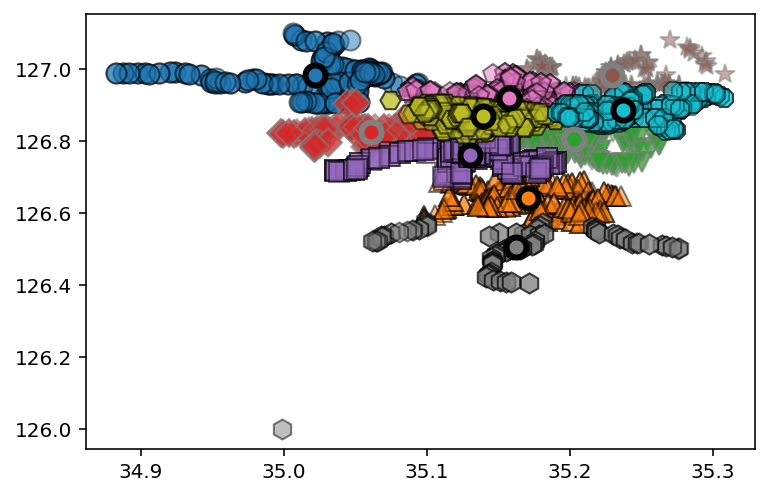

In [26]:
# 클러스터 중심을 시각화
kmeans.cluster_centers_

mglearn.discrete_scatter(X_bus[:, 0], X_bus[:, 1], kmeans.labels_, alpha=0.5)

xcenter = kmeans.cluster_centers_[:, 0]
ycenter = kmeans.cluster_centers_[:, 1]
mglearn.discrete_scatter(xcenter, ycenter, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         markers='o', markeredgewidth=3)
plt.show()

# 최단 경로 추천하기

* 입력 가능한 정류장명 : 정광고입구, 첨단생활체육공원, 상무역, 전남공무원교육원, 기아차정문, 평화맨션, 518민주화운동기록관, 진월대주아파트, 성촌마을/전통문화관

In [27]:
# 버스 정류장에서 가장 가까운 관광지 찾기
name_bus = input('버스정류장을 입력하세요 : ' )
index_loc = df_bus.loc[(df_bus['정류소명(국문)'] ==name_bus)].index.tolist()
index_loc = index_loc[0]
bus = [df_bus.loc[index_loc]['위도'],  df_bus.loc[index_loc]['경도']]

list_h = []
for i in range(len(df_loc.index)):
    tour = [df_loc.loc[i]['위도'],  df_loc.loc[i]['경도']]
    list_h.append(tour)

h= []
for i in range(len(list_h)):
    h.append(haversine(bus, list_h[i]))
print(min(h))  

min_loc = numpy.argmin(h)
min_tour = df_loc.loc[min_loc]['사업장명']
print('관광지 이름 : ', min_tour)

버스정류장을 입력하세요 : 서영대
0.3658414155086796
관광지 이름 :  월드킹(운암점)


In [28]:
# 첫번째 관광지에서 가장 가까운 관광지 찾기
index_min_tour = df_loc.loc[df_loc['사업장명'] == min_tour].index
index_min_tour = index_min_tour[0]
min_tour_loc = [df_loc.loc[index_min_tour]['위도'] ,df_loc.loc[index_min_tour]['경도']]

h2 = []
for i in range(len(list_h)):
    h2.append(haversine(min_tour_loc, list_h[i]))

h2.remove(0.0)
m_h2 = min(h2)
print(m_h2)

dis_idx1 = numpy.argmin(h2)
min_tour2 = df_loc.loc[dis_idx1]['사업장명']
print(min_tour2)

0.8350131585292233
점프노리 동천점


In [29]:
# 첫번째 관광지 지점 삭제해주기
place = df_loc['사업장명'].tolist()
del place[index_min_tour]
len(place)

176

In [30]:
# 두번째 관광지에서 가장 가까운 관광지 찾기
third = df_loc[df_loc['사업장명'] == min_tour2].index
third = third[0]
third_tour_loc = [df_loc.loc[third]['위도'] ,df_loc.loc[third]['경도']]

h3 = []
for i in range(len(list_h)):
    h3.append(haversine(third_tour_loc, list_h[i]))

h3.remove(0.0)
m_h3 = min(h3)
print(m_h3)

dis_idx2 = numpy.argmin(h3)
min_tour3 = df_loc.loc[dis_idx2]['사업장명']
print(min_tour3)

0.8350131585292233
리틀빅 키즈카페


In [31]:
# 최단 경로를 지도로 보여주기

m = folium.Map([df_bus.loc[index_loc]['위도'],  df_bus.loc[index_loc]['경도']], zoom_start=18)

# 버스 위치
folium.Marker([df_bus.loc[index_loc]['위도'],  df_bus.loc[index_loc]['경도']],
                tooltip=df_bus.loc[index_loc]['정류소명(국문)'],
                icon=folium.Icon(color='red',icon='heart')).add_to(m)

# 첫번째 관광지 위치
folium.Marker([df_loc.loc[min_loc]['위도'], df_loc.loc[min_loc]['경도']],
                tooltip= df_loc.loc[min_loc]['사업장명'],
                icon=folium.Icon(color='blue',icon='flag')).add_to(m)

# 두번째 관광지 위치
folium.Marker([df_loc.loc[min_loc]['위도'], df_loc.loc[dis_idx1]['경도']],
                tooltip= df_loc.loc[dis_idx1]['사업장명'],
                icon=folium.Icon(color='blue',icon='flag')).add_to(m)

# 세번째 관광지 위치
folium.Marker([df_loc.loc[min_loc]['위도'], df_loc.loc[dis_idx2]['경도']],
                tooltip= df_loc.loc[dis_idx2]['사업장명'],
                icon=folium.Icon(color='blue',icon='flag')).add_to(m)

m

In [32]:
# 관광지 중심 클러스터와 버스정류장 거리 최솟값 구하기
m_list = []
for i in range(len(k_center1)):
    k_list = []
    a = k_center1[i]
    for v in range(len(df_bus.index)):
        k_list.append(haversine([df_bus.loc[v]['위도'],  df_bus.loc[v]['경도']], k_center1[i]))
    min_loc = numpy.argmin(k_list)
    m_list.append(min_loc)
    min_bus = df_bus.loc[min_loc]['정류소명(국문)']

In [33]:
# 관광지 중심 클러스터와 버스정류장 위치 표시
m = folium.Map( [35.145534402376065, 126.84714958396903], zoom_start=12)

# 관광지 군집화 위치
label_number = len(df_loc['라벨'].unique())
map_color = ['darkgreen', 'blue', 'green', 'lightgray', 'orange', 'purple', 'darkpurple', 'red',  'darkblue', 'gray'] 
m = folium.Map(location=[35.1, 126.8], zoom_start=12)

for i in range(label_number):
    a_list = df_loc.index[df_loc['라벨'] == i].tolist()
    for v in a_list:
        b_list = [df_loc.loc[v]['위도'],  df_loc.loc[v]['경도']]
        folium.Marker(b_list,
                tooltip=df_loc.loc[v]['사업장명'],
                popup=df_loc.loc[v]['도로명전체주소'],
                icon=folium.Icon(color=map_color[i],icon='flag')).add_to(m)

# 버스 정류장 좌표(흰색 마커)
for i in m_list:
    folium.Marker([df_bus.loc[i]['위도'],  df_bus.loc[i]['경도']],
                    tooltip=df_bus.loc[i]['정류소명(국문)'],
                    icon=folium.Icon(color='white',icon='heart')).add_to(m)

# 중심 클러스터 위치
for i in range(len(k_center1)):
    folium.CircleMarker(k_center1[i],
                    tooltip= i,
                    radius = 50, olor='#3186cc', fill_color='#3186cc', fill=True).add_to(m)
m

In [34]:
# 지도 저장
m.save('map.html')